https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/

https://opendata.paris.fr/explore/dataset/quartier_paris/

https://www.eea.europa.eu/data-and-maps/data/urban-atlas

In [1]:
%matplotlib inline

In [2]:
import geopandas

In [5]:
df = geopandas.read_file("stations-velib-disponibilites-en-temps-reel.geojson")

In [6]:
df.head()

,status,contract_name,name,bonus,bike_stands,number,last_update,available_bike_stands,banking,available_bikes,address,geometry
0,OPEN,Paris,14002 - RASPAIL QUINET,True,44,14002,2017-08-26T13:04:34,39,True,4,FACE 4 BD EDGAR QUINET - 75014 PARIS,POINT (2.32955509721 48.8391991672)
1,OPEN,Paris,20503 - COURS DE VINCENNES PYRÉNÉES,False,21,20503,2017-08-26T15:55:14,18,False,3,1 RUE DES PYRENEES - 75020 PARIS,POINT (2.40590731702 48.847724969)
2,OPEN,Paris,20011 - PYRÉNÉES-DAGORNO,False,21,20011,2017-08-26T17:37:11,21,True,0,103 RUE DES PYRENNEES - 75020 PARIS,POINT (2.40516852064 48.855501354)
3,CLOSED,Paris,31008 - VINCENNES (MONTREUIL),False,56,31008,2017-08-26T17:37:11,0,True,0,7 BIS RUE DE VINCENNES - 93100 MONTREUIL,POINT (2.43736866129 48.857702134)
4,OPEN,Paris,43006 - MINIMES (VINCENNES),False,28,43006,2017-08-26T17:37:25,1,True,27,30 AVENUE DES MINIMES - 94300 VINCENNES,POINT (2.43079345113 48.8414868563)


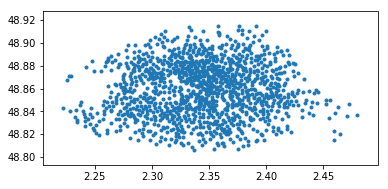

In [7]:
df.plot(markersize=3)

In [8]:
import osmnx as ox

In [9]:
G = ox.gdf_from_place('Paris, France')

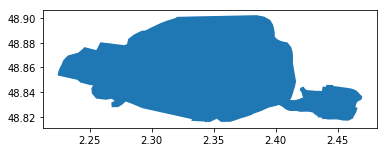

In [9]:
G.plot()

In [10]:
G = ox.graph_from_place('Paris, France', network_type='drive')

/home/joris/miniconda3/envs/dev/lib/python3.5/site-packages/osmnx/utils.py:268: RuntimeWarning: invalid value encountered in arccos
  arc = np.arccos(cos)


In [11]:
df1, df2 = ox.graph_to_gdfs(G)

In [18]:
df2.head()

,access,bridge,geometry,highway,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,"LINESTRING (2.3711204 48.8987287, 2.3713436 48...",primary,0,4,218.522001,50,Boulevard MacDonald,False,13859914,NaN,NaN,NaN,442371,209141276,NaN
1,NaN,NaN,"LINESTRING (2.3711204 48.8987287, 2.3709746 48...",primary,0,NaN,60.987755,50,Boulevard MacDonald,True,178237238,NaN,NaN,NaN,442371,1886061102,NaN
2,NaN,NaN,"LINESTRING (2.3711204 48.8987287, 2.3711267 48...",primary,0,NaN,111.874788,NaN,Avenue de la Porte d'Aubervilliers,True,19923111,NaN,NaN,NaN,442371,3805263959,NaN
3,NaN,NaN,"LINESTRING (2.4051359 48.863424, 2.4054913 48....",residential,0,NaN,44.238689,NaN,Villa des Lyanes,False,164380899,NaN,NaN,NaN,1760247812,1760247816,NaN
4,NaN,NaN,"LINESTRING (2.4051359 48.863424, 2.4042024 48....",living_street,0,NaN,91.437856,NaN,Rue des Lyanes,True,14577794,NaN,NaN,NaN,1760247812,143653569,NaN


In [25]:
ox.save_graph_shapefile(G, 'openstreetmap_paris', folder='.')

In [28]:
new = geopandas.read_file("openstreetmap_paris/edges/")

In [29]:
new.head()

,access,bridge,from,highway,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,to,tunnel,width,geometry
0,None,None,1245546489,primary,0,None,10.441171286969725,50,Boulevard MacDonald,True,191694881,None,None,442371,None,None,"LINESTRING (2.3711204 48.8987287, 2.3710461 48..."
1,None,None,442371,primary,0,4,218.52200148977164,50,Boulevard MacDonald,False,13859914,None,None,209141276,None,None,"LINESTRING (2.3711204 48.8987287, 2.3713436 48..."
2,None,None,442371,primary,0,None,60.98775515463154,50,Boulevard MacDonald,True,178237238,None,None,1886061102,None,None,"LINESTRING (2.3711204 48.8987287, 2.3709746 48..."
3,None,None,442371,primary,0,None,111.87478765505494,None,Avenue de la Porte d'Aubervilliers,True,19923111,None,None,3805263959,None,None,"LINESTRING (2.3711204 48.8987287, 2.3711267 48..."
4,None,None,1760247812,residential,0,None,44.238688986210406,None,Villa des Lyanes,False,164380899,None,None,1760247816,None,None,"LINESTRING (2.4051359 48.863424, 2.4054913 48...."


In [31]:
new.head().values

array([[None, None, '1245546489', 'primary', '0', None,
        '10.441171286969725', '50', 'Boulevard MacDonald', 'True',
        '191694881', None, None, '442371', None, None,
       [None, None, '442371', 'primary', '0', '4', '218.52200148977164',
        '50', 'Boulevard MacDonald', 'False', '13859914', None, None,
        '209141276', None, None,
       [None, None, '442371', 'primary', '0', None, '60.98775515463154',
        '50', 'Boulevard MacDonald', 'True', '178237238', None, None,
        '1886061102', None, None,
       [None, None, '442371', 'primary', '0', None, '111.87478765505494',
        None, "Avenue de la Porte d'Aubervilliers", 'True', '19923111',
        None, None, '3805263959', None, None,
       [None, None, '1760247812', 'residential', '0', None,
        '44.238688986210406', None, 'Villa des Lyanes', 'False',
        '164380899', None, None, '1760247816', None, None,
        <shapely.geometry.linestring.LineString object at 0x7fed2680aeb8>]], dtype=object)

In [20]:
df2['oneway'] = df2['oneway'].astype(int)

In [23]:
df2.dtypes

access       object
bridge       object
geometry     object
highway      object
key           int64
lanes        object
length      float64
maxspeed     object
name         object
oneway        int64
osmid        object
ref          object
service      object
tunnel       object
u             int64
v             int64
width        object
dtype: object

In [21]:
df2.to_file("openstreetmap_paris.shp")

ValueError: Invalid field type <class 'list'>

[(48.815, 48.905), (2.25, 2.42)]

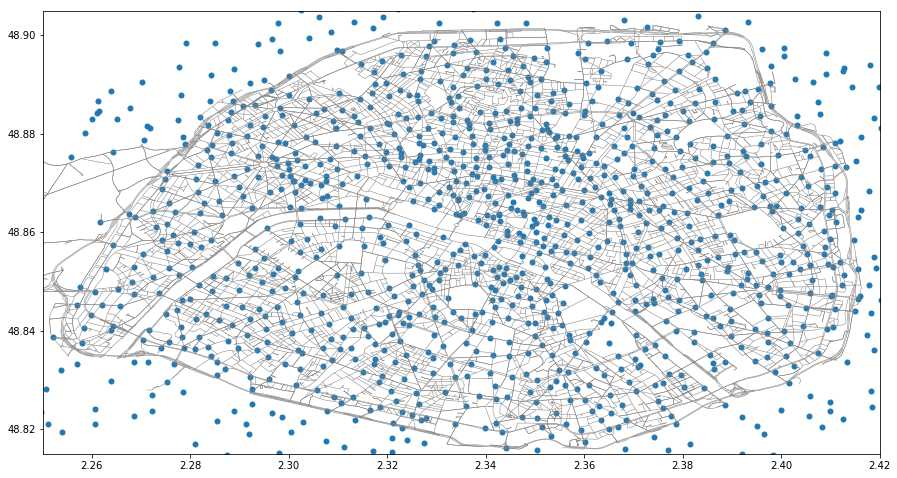

In [17]:
ax = df2.plot(linewidth=0.5, color='grey', figsize=(15, 10))
df.plot(ax=ax, markersize=5)
#sub.plot(ax=ax, markersize=3, color='red')
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905))

In [49]:
urban_atlas = geopandas.read_file('/fr001l_paris', vfs='zip:///home/joris/scipy/talks/2017_EuroScipy_geopandas/fr001l_paris.zip')

,CITIES,LUZ_OR_CIT,CODE,ITEM,PROD_DATE,SHAPE_LEN,SHAPE_AREA,geometry
0,Paris,FR001L,11100,Continuous Urban Fabric (S.L. > 80%),2011,249.972284,3650.809242,"POLYGON ((3764994.27690521 2807816.82037744, 3..."
1,Paris,FR001L,11100,Continuous Urban Fabric (S.L. > 80%),2011,582.006964,14778.414523,"POLYGON ((3765281.903142639 2808253.469916547,..."
2,Paris,FR001L,11100,Continuous Urban Fabric (S.L. > 80%),2011,321.658530,5283.821299,"POLYGON ((3761791.322670917 2808815.583325071,..."
3,Paris,FR001L,11100,Continuous Urban Fabric (S.L. > 80%),2011,248.371450,3801.257426,"POLYGON ((3761894.395486757 2808892.963017853,..."
4,Paris,FR001L,11100,Continuous Urban Fabric (S.L. > 80%),2011,263.743574,4049.353324,"POLYGON ((3761963.296803899 2808944.651598095,..."
5,Paris,FR001L,11100,Continuous Urban Fabric (S.L. > 80%),2011,460.453063,9344.877373,"POLYGON ((3762226.37487137 2809024.736483418, ..."
6,Paris,FR001L,11100,Continuous Urban Fabric (S.L. > 80%),2011,333.585428,6587.215591,"POLYGON ((3761981.371754311 2808958.202896202,..."
7,Paris,FR001L,11100,Continuous Urban Fabric (S.L. > 80%),2011,467.804972,8625.615383,"POLYGON ((3762005.20194841 2808969.710131895, ..."
8,Paris,FR001L,11100,Continuous Urban Fabric (S.L. > 80%),2011,400.095586,5600.960216,"POLYGON ((3771872.293117483 2808226.257485429,..."
9,Paris,FR001L,11100,Continuous Urban Fabric (S.L. > 80%),2011,638.453490,18028.333574,"POLYGON ((3771713.891046796 2808220.429444875,..."


In [55]:
urban_atlas.crs

{'init': 'epsg:3035'}

In [57]:
x, y = 3760000, 2890000

In [59]:
us1 = urban_atlas.cx[x-5000 : x+5000, y-5000 : y+5000]

In [60]:
len(us1)

7483

In [71]:
us1.loc[156537].geometry.area

13409695.062410185

In [ ]:
us1.head()

In [ ]:
us1.ITEM.value_counts()

In [66]:
us1.boundary.length.sort_values(ascending=nding=False)

156537    2.719309e+06
156290    2.354123e+06
156554    2.340333e+06
156291    2.105803e+06
156454    1.575581e+06
114544    2.846892e+04
114485    1.494355e+04
114329    1.475223e+04
114489    1.341458e+04
120480    1.075157e+04
121064    9.697758e+03
114462    9.521040e+03
114353    6.251362e+03
106133    5.714614e+03
156433    4.568679e+03
11943     4.296989e+03
121117    4.100246e+03
114471    3.743210e+03
101487    3.662811e+03
114327    3.636063e+03
120463    3.385146e+03
114261    3.323271e+03
102887    3.213838e+03
154984    3.128102e+03
114309    3.024831e+03
105660    3.001141e+03
105730    2.822940e+03
106135    2.772784e+03
120633    2.761174e+03
103664    2.743331e+03
              ...     
11861     1.397889e+02
105765    1.395390e+02
10738     1.393077e+02
13591     1.392942e+02
14010     1.384790e+02
11796     1.374782e+02
11990     1.365330e+02
12264     1.356539e+02
14144     1.354938e+02
11562     1.340353e+02
11945     1.334781e+02
11939     1.330110e+02
9045      1

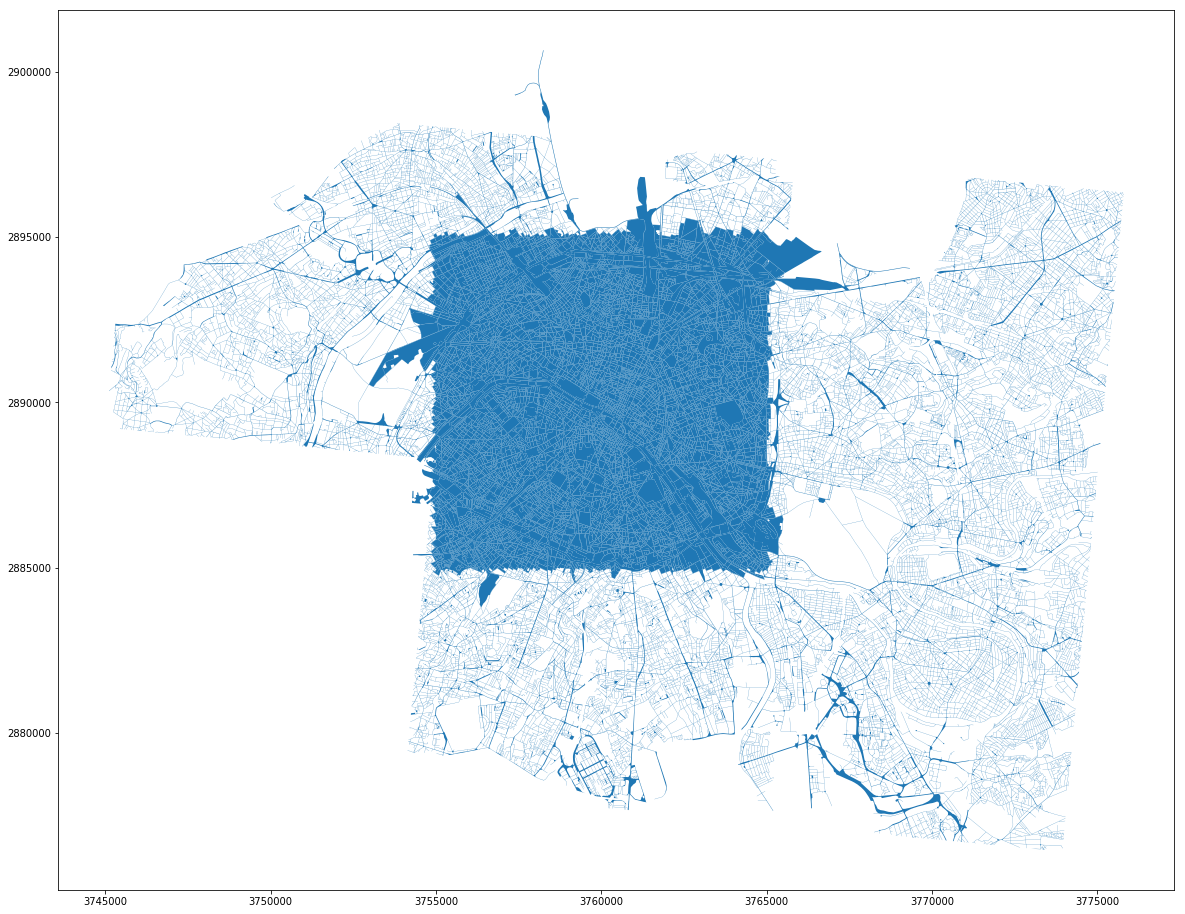

In [62]:
us1.plot(figsize=(20,20))

In [51]:
len(urban_atlas)

157084

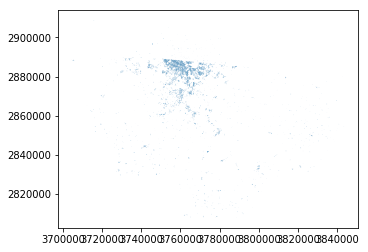

In [54]:
urban_atlas.head(10000).plot()

In [28]:
geopandas.read_file("./fr001l_paris2/fr001l_paris/fr", driver='ESRI Shapefile')

FionaValueError: No dataset found at path '/vsizip//home/joris/scipy/talks/2017_EuroScipy_geopandas/fr001l_paris.zip' using drivers: ['ESRI Shapefile']

In [22]:
geopandas.datasets.get_path('nybb')

'zip:///home/joris/scipy/geopandas/geopandas/datasets/nybb_16a.zip'

In [29]:
import geopy

In [32]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Notre Dame Paris")

In [37]:
import shapely.geometry

In [39]:
shapely.geometry.asShape??

In [40]:
notre_dame = shapely.geometry.Point(location.longitude, location.latitude)

In [46]:
sub = df[df.within(notre_dame.buffer(0.005))]

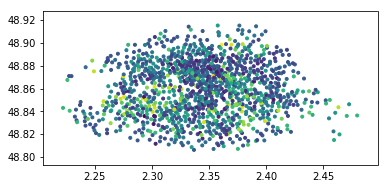

In [9]:
df.plot(markersize=3, column='bike_stands')

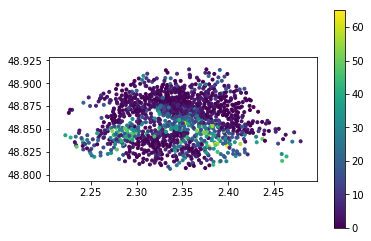

In [11]:
df.plot(markersize=3, column='available_bikes', legend=True)